<a href="https://colab.research.google.com/github/PNeil95/pandas_DataChampions/blob/main/ChampionsSoccer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importando librerias***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/champions.xlsx')

***Inspeccionamos datos***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             62 non-null     object
 1   Winner             62 non-null     object
 2   Winner Country     62 non-null     object
 3   Winner Score       62 non-null     int64 
 4   scorer 1           58 non-null     object
 5   scorer 2           37 non-null     object
 6   scorer 3           20 non-null     object
 7   scorer 4           10 non-null     object
 8   scorer 5           2 non-null      object
 9   scorer 6           1 non-null      object
 10  scorer 7           1 non-null      object
 11  Finalist Score     62 non-null     int64 
 12  opponent scorer 1  31 non-null     object
 13  opponent scorer 2  6 non-null      object
 14  opponent scorer 3  4 non-null      object
 15  Finalist           62 non-null     object
 16  Finalist Country   62 non-null     object
 17 

Ver inicio y final del Df con head() y tail()

In [ ]:
df.head()

,Season,Winner,Winner Country,Winner Score,scorer 1,scorer 2,scorer 3,scorer 4,scorer 5,scorer 6,scorer 7,Finalist Score,opponent scorer 1,opponent scorer 2,opponent scorer 3,Finalist,Finalist Country,Venue,Attendance
0,1955–56,Real Madrid,Spain,4,Di Stefano,Rial,Marquitos,Rial,NaN,NaN,NaN,3,Leblond,Templin,Hidalgo,Stade de Reims,France,"France Parc des Princes, Paris",38239
1,1956–57,Real Madrid,Spain,2,Di Stefano,Gento,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000
2,1957–58,Real Madrid,Spain,3,Di Stefano,Rial,Gento,NaN,NaN,NaN,NaN,2,Schiaffino,Grillo,NaN,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000
3,1958–59,Real Madrid,Spain,2,Mateos,Di Stefano,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000
4,1959–60,Real Madrid,Spain,7,Di Stefano,Di Stefano,Puskas,Puskas,Puskas,Puskas,Di Stefano,3,Kreiss,Stein,Stein,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621


In [ ]:
df.tail()

,Season,Winner,Winner Country,Winner Score,scorer 1,scorer 2,scorer 3,scorer 4,scorer 5,scorer 6,scorer 7,Finalist Score,opponent scorer 1,opponent scorer 2,opponent scorer 3,Finalist,Finalist Country,Venue,Attendance
57,2012–13,Bayern Munich,Germany,2,Mandzukic,Robben,NaN,NaN,NaN,NaN,NaN,1,Gundogan,NaN,NaN,Borussia Dortmund,Germany,"England Wembley Stadium, London",86298
58,2013–14,Real Madrid,Spain,4,Ramos,Bale,Marcelo,Ronaldo,NaN,NaN,NaN,1,Godin,NaN,NaN,Atlético Madrid,Spain,"Portugal Estádio da Luz, Lisbon",60976
59,2014–15,Barcelona,Spain,3,Rakiric,Suarez,Neymar,NaN,NaN,NaN,NaN,1,Morata,NaN,NaN,Juventus,Italy,"Germany Olympiastadion, Berlin",70442
60,2015–16,Real Madrid,Spain,1,Ramos,NaN,NaN,NaN,NaN,NaN,NaN,1,Carrasco,NaN,NaN,Atlético Madrid,Spain,"Italy San Siro, Milan",71942
61,2016–17,Real Madrid,Spain,4,Ronaldo,Casemiro,Ronaldo,Asensio,NaN,NaN,NaN,1,Mandzukic,NaN,NaN,Juventus,Italy,"Wales Millennium Stadium, Cardiff",65842


Crear una columna que contenga el numero de goles por partido

In [ ]:
df['Game'] = df['Winner'] + 'vs.' + df['Finalist']
df.head()

,Season,Winner,Winner Country,Winner Score,scorer 1,scorer 2,scorer 3,scorer 4,scorer 5,scorer 6,scorer 7,Finalist Score,opponent scorer 1,opponent scorer 2,opponent scorer 3,Finalist,Finalist Country,Venue,Attendance,Game,Result
0,1955–56,Real Madrid,Spain,4,Di Stefano,Rial,Marquitos,Rial,NaN,NaN,NaN,3,Leblond,Templin,Hidalgo,Stade de Reims,France,"France Parc des Princes, Paris",38239,Real Madridvs.Stade de Reims,4-3
1,1956–57,Real Madrid,Spain,2,Di Stefano,Gento,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000,Real Madridvs.Fiorentina,2-0
2,1957–58,Real Madrid,Spain,3,Di Stefano,Rial,Gento,NaN,NaN,NaN,NaN,2,Schiaffino,Grillo,NaN,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000,Real Madridvs.Milan,3-2
3,1958–59,Real Madrid,Spain,2,Mateos,Di Stefano,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000,Real Madridvs.Stade de Reims,2-0
4,1959–60,Real Madrid,Spain,7,Di Stefano,Di Stefano,Puskas,Puskas,Puskas,Puskas,Di Stefano,3,Kreiss,Stein,Stein,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621,Real Madridvs.Eintracht Frankfurt,7-3


In [ ]:
df['Result'] = df['Winner Score'].astype(str) + '-' + df['Finalist Score'].astype(str)
df.head()

,Season,Winner,Winner Country,Winner Score,scorer 1,scorer 2,scorer 3,scorer 4,scorer 5,scorer 6,scorer 7,Finalist Score,opponent scorer 1,opponent scorer 2,opponent scorer 3,Finalist,Finalist Country,Venue,Attendance,Game,Result
0,1955–56,Real Madrid,Spain,4,Di Stefano,Rial,Marquitos,Rial,NaN,NaN,NaN,3,Leblond,Templin,Hidalgo,Stade de Reims,France,"France Parc des Princes, Paris",38239,Real Madridvs.Stade de Reims,4-3
1,1956–57,Real Madrid,Spain,2,Di Stefano,Gento,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000,Real Madridvs.Fiorentina,2-0
2,1957–58,Real Madrid,Spain,3,Di Stefano,Rial,Gento,NaN,NaN,NaN,NaN,2,Schiaffino,Grillo,NaN,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000,Real Madridvs.Milan,3-2
3,1958–59,Real Madrid,Spain,2,Mateos,Di Stefano,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000,Real Madridvs.Stade de Reims,2-0
4,1959–60,Real Madrid,Spain,7,Di Stefano,Di Stefano,Puskas,Puskas,Puskas,Puskas,Di Stefano,3,Kreiss,Stein,Stein,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621,Real Madridvs.Eintracht Frankfurt,7-3


In [ ]:
df['Goals'] = df['Winner Score'] + df['Finalist Score']
df.head()

,Season,Winner,Winner Country,Winner Score,scorer 1,scorer 2,scorer 3,scorer 4,scorer 5,scorer 6,scorer 7,Finalist Score,opponent scorer 1,opponent scorer 2,opponent scorer 3,Finalist,Finalist Country,Venue,Attendance,Game,Result,Goals
0,1955–56,Real Madrid,Spain,4,Di Stefano,Rial,Marquitos,Rial,NaN,NaN,NaN,3,Leblond,Templin,Hidalgo,Stade de Reims,France,"France Parc des Princes, Paris",38239,Real Madridvs.Stade de Reims,4-3,7
1,1956–57,Real Madrid,Spain,2,Di Stefano,Gento,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Fiorentina,Italy,"Spain Santiago Bernabéu Stadium, Madrid",124000,Real Madridvs.Fiorentina,2-0,2
2,1957–58,Real Madrid,Spain,3,Di Stefano,Rial,Gento,NaN,NaN,NaN,NaN,2,Schiaffino,Grillo,NaN,Milan,Italy,"Belgium Heysel Stadium, Brussels",67000,Real Madridvs.Milan,3-2,5
3,1958–59,Real Madrid,Spain,2,Mateos,Di Stefano,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Stade de Reims,France,"West Germany Neckarstadion, Stuttgart",72000,Real Madridvs.Stade de Reims,2-0,2
4,1959–60,Real Madrid,Spain,7,Di Stefano,Di Stefano,Puskas,Puskas,Puskas,Puskas,Di Stefano,3,Kreiss,Stein,Stein,Eintracht Frankfurt,West Germany,"Scotland Hampden Park, Glasgow",127621,Real Madridvs.Eintracht Frankfurt,7-3,10


In [ ]:
df_red = df[['Season','Winner','Game','Result','Goals','Venue','Attendance']]
df_red.head()

,Season,Winner,Game,Result,Goals,Venue,Attendance
0,1955–56,Real Madrid,Real Madridvs.Stade de Reims,4-3,7,"France Parc des Princes, Paris",38239
1,1956–57,Real Madrid,Real Madridvs.Fiorentina,2-0,2,"Spain Santiago Bernabéu Stadium, Madrid",124000
2,1957–58,Real Madrid,Real Madridvs.Milan,3-2,5,"Belgium Heysel Stadium, Brussels",67000
3,1958–59,Real Madrid,Real Madridvs.Stade de Reims,2-0,2,"West Germany Neckarstadion, Stuttgart",72000
4,1959–60,Real Madrid,Real Madridvs.Eintracht Frankfurt,7-3,10,"Scotland Hampden Park, Glasgow",127621


Promedio de goles usando el metodo mean()

In [ ]:
df_red['Goals'].mean()

2.725806451612903

In [ ]:
df_red['Attendance'].mean()

66394.64516129032

Resumen estadistico completo de asistencias y goles, usando describe

In [ ]:
df_red[['Attendance','Goals']].describe()

,Attendance,Goals
count,62.000000,62.000000
mean,66394.645161,2.725806
std,18594.730692,1.951623
min,26732.000000,0.000000
25%,53606.250000,1.000000
50%,65121.000000,2.000000
75%,72035.250000,4.000000
max,127621.000000,10.000000


1.¿Cual es el equipo con mas trofeos?

In [ ]:
df_red['Winner'].value_counts()

Real Madrid          12
Milan                 7
Bayern Munich         5
Barcelona             5
Liverpool             5
Ajax                  4
Manchester United     3
Internazionale        3
Porto                 2
Nottingham Forest     2
Benfica               2
Juventus              2
Feyenoord             1
Chelsea               1
Aston Villa           1
PSV Eindhoven         1
Hamburg               1
Borussia Dortmund     1
Steaua București      1
Celtic                1
Marseille             1
Red Star Belgrade     1
Name: Winner, dtype: int64

2.¿En que temporada gano el equipo con mas trofeos?

In [ ]:
df_red[(df_red['Winner'] == 'Real Madrid')]

,Season,Winner,Game,Result,Goals,Venue,Attendance
0,1955–56,Real Madrid,Real Madridvs.Stade de Reims,4-3,7,"France Parc des Princes, Paris",38239
1,1956–57,Real Madrid,Real Madridvs.Fiorentina,2-0,2,"Spain Santiago Bernabéu Stadium, Madrid",124000
2,1957–58,Real Madrid,Real Madridvs.Milan,3-2,5,"Belgium Heysel Stadium, Brussels",67000
3,1958–59,Real Madrid,Real Madridvs.Stade de Reims,2-0,2,"West Germany Neckarstadion, Stuttgart",72000
4,1959–60,Real Madrid,Real Madridvs.Eintracht Frankfurt,7-3,10,"Scotland Hampden Park, Glasgow",127621
10,1965–66,Real Madrid,Real Madridvs.Partizan,2-1,3,"Belgium Heysel Stadium, Brussels",46745
42,1997–98,Real Madrid,Real Madridvs.Juventus,1-0,1,"Netherlands Amsterdam Arena, Amsterdam",48500
44,1999–2000,Real Madrid,Real Madridvs.Valencia,3-0,3,"France Stade de France, Saint-Denis",80000
46,2001–02,Real Madrid,Real Madridvs.Bayer Leverkusen,2-1,3,"Scotland Hampden Park, Glasgow",50499
58,2013–14,Real Madrid,Real Madridvs.Atlético Madrid,4-1,5,"Portugal Estádio da Luz, Lisbon",60976


Si desamos mostrar solo las temporadas, usamos el d filtrado a otro df que contenga esa columna

In [ ]:
rm = df_red[(df_red['Winner'] == 'Real Madrid')]
rm = rm[['Season','Winner']]
rm

,Season,Winner
0,1955–56,Real Madrid
1,1956–57,Real Madrid
2,1957–58,Real Madrid
3,1958–59,Real Madrid
4,1959–60,Real Madrid
10,1965–66,Real Madrid
42,1997–98,Real Madrid
44,1999–2000,Real Madrid
46,2001–02,Real Madrid
58,2013–14,Real Madrid


3.¿Cuales son las 5 finales con mas asistencias?

In [ ]:
df_red.sort_values('Attendance', ascending=False).head(5)

,Season,Winner,Game,Result,Goals,Venue,Attendance
4,1959–60,Real Madrid,Real Madridvs.Eintracht Frankfurt,7-3,10,"Scotland Hampden Park, Glasgow",127621
1,1956–57,Real Madrid,Real Madridvs.Fiorentina,2-0,2,"Spain Santiago Bernabéu Stadium, Madrid",124000
33,1988–89,Milan,Milanvs.Steaua București,4-0,4,"Spain Camp Nou, Barcelona",97000
22,1977–78,Liverpool,Liverpoolvs.Club Brugge,1-0,1,"England Wembley Stadium, London",92500
12,1967–68,Manchester United,Manchester Unitedvs.Benfica,4-1,5,"England Wembley Stadium, London",92225


***Visualizando datos con Matplotlib***

1.Tendencia de asistencia

- Grafico de linea

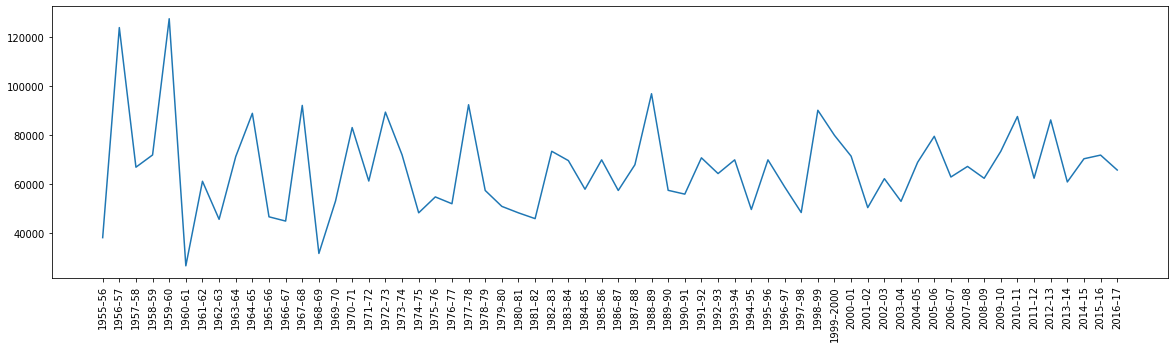

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.plot('Season','Attendance',data=df_red)

2.Numero de trofeos por equipo

- Metodo plot() con metodo value_counts()

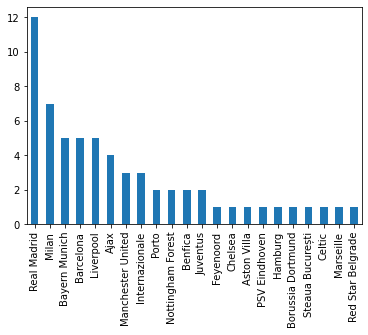

In [ ]:
df_red['Winner'].value_counts().plot.bar()

- Recreando el gráfico usando barras horizontales

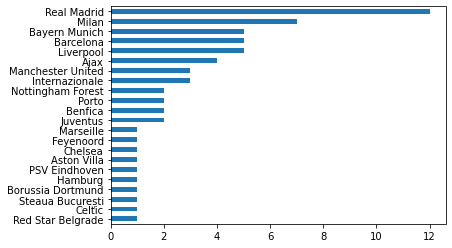

In [ ]:
df_red['Winner'].value_counts().sort_values(ascending=True).plot.barh()

3.Distribucion de numero de goles 

- Histograma

(array([ 4., 15., 13., 12.,  9.,  5.,  1.,  1.,  1.,  1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

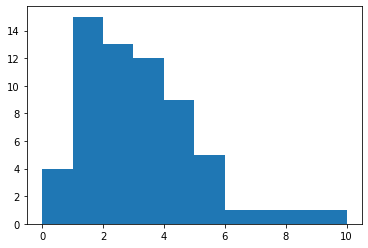

In [ ]:
plt.hist('Goals',data=df_red)